In [77]:
import os
import numpy as np
import netCDF4
import datetime
import matplotlib.pyplot as plt

In [4]:
datadir = "/data/SeaDataCloud/NorthSea/"
figdir = "/home/ctroupin/Projects/SeaDataCloud/Julia/Climatologies/NorthSea/figures/"
datafile1 = os.path.join(datadir, "NorthSea_obs_temperature.nc")
datafile2 = os.path.join(datadir, "NorthSea_obs_temperature_wod.nc")

In [70]:
with netCDF4.Dataset(datafile1, "r") as nc1:
    obsid1 = nc1.variables["obsid"][:]
    obstimeval1 = nc1.variables["obstime"][:]
    obstimeunits1 = nc1.variables["obstime"].units
    obsdate1 = netCDF4.num2date(obstimeval1, obstimeunits1)

In [71]:
with netCDF4.Dataset(datafile2, "r") as nc2:
    obsid2 = nc2.variables["obsid"][:]
    obstimeval2 = nc2.variables["obstime"][:]
    obstimeunits2 = nc2.variables["obstime"].units
    obsdate2 = netCDF4.num2date(obstimeval2, obstimeunits2)

## Compute the unique indices
Need to convert to a list of string.

In [63]:
%time obsid1_c = [oo.tostring().decode("UTF-8").rstrip('\x00') for oo in obsid1]

CPU times: user 3min 9s, sys: 2.47 s, total: 3min 11s
Wall time: 3min 8s


In [65]:
%time obsid2_c = [oo.tostring().decode("UTF-8").rstrip('\x00') for oo in obsid2]

CPU times: user 647 ms, sys: 36.2 ms, total: 683 ms
Wall time: 683 ms


In [66]:
obsid1_u, ind1 = np.unique(obsid1_c, return_index=True)
obsid2_u, ind2 = np.unique(obsid2_c, return_index=True)

## Plot

In [93]:
xmin = datetime.date(1955, 1, 1).toordinal()
xmax = datetime.date(2015, 1, 1).toordinal()

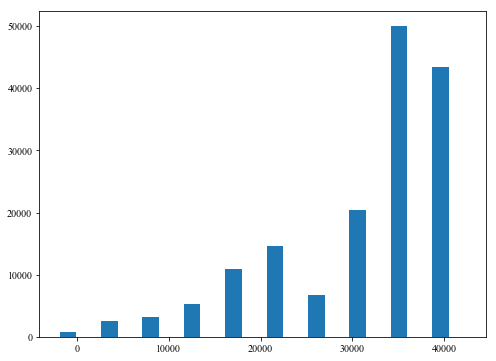

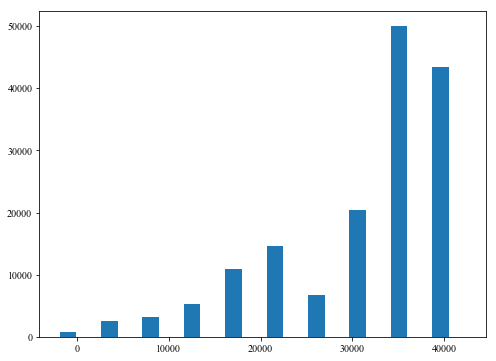

In [111]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.hist([obstime1[ind1], obstime2[ind2]], histtype='bar', bins=10,
         #bins=[datetime.datetime(yyyy, 1, 1).toordinal() for yyyy in range(1955, 2016)],
         )
#plt.xlim(xmin, xmax)
plt.show()
plt.close()

In [98]:
plt.hist?

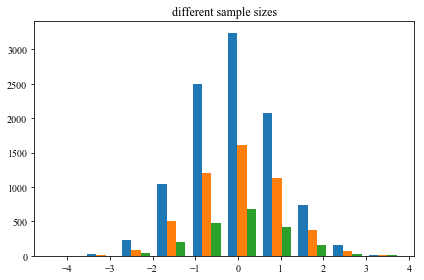

In [113]:
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig = plt.figure()
ax = plt.subplot(111)

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax.hist(x_multi, n_bins, histtype='bar')
ax.set_title('different sample sizes')

fig.tight_layout()
plt.show()